In [1]:
import numpy as np
import pickle
import sys
from matplotlib import pyplot as plt
import random 
import os
sys.path.insert(0, '../')

import network_functions as nf

/n/home01/spetti/.conda/envs/alphafold_new/lib/python3.7/site-packages/jax/experimental/optimizers.py:30: FutureWarning: jax.experimental.optimizers is deprecated, import jax.example_libraries.optimizers instead
  FutureWarning)


## functions

In [2]:
# BLOSUM62 from https://www.ncbi.nlm.nih.gov/IEB/ToolBox/C_DOC/lxr/source/data/BLOSUM62   
array_as_str = "4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0 -2 -1 -1 -1 -4"\
" -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3 -1 -2  0 -1 -4"\
" -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3  4 -3  0 -1 -4"\
" -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3  4 -3  1 -1 -4"\
" 0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1 -3 -1 -3 -1 -4"\
" -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2  0 -2  4 -1 -4"\
" -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2  1 -3  4 -1 -4"\
" 0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3 -1 -4 -2 -1 -4"\
" -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3  0 -3  0 -1 -4"\
" -1 -3 -3 -3 -1 -3 -3 -4 -3  4  2 -3  1  0 -3 -2 -1 -3 -1  3 -3  3 -3 -1 -4"\
" -1 -2 -3 -4 -1 -2 -3 -4 -3  2  4 -2  2  0 -3 -2 -1 -2 -1  1 -4  3 -3 -1 -4"\
" -1  2  0 -1 -3  1  1 -2 -1 -3 -2  5 -1 -3 -1  0 -1 -3 -2 -2  0 -3  1 -1 -4"\
" -1 -1 -2 -3 -1  0 -2 -3 -2  1  2 -1  5  0 -2 -1 -1 -1 -1  1 -3  2 -1 -1 -4"\
" -2 -3 -3 -3 -2 -3 -3 -3 -1  0  0 -3  0  6 -4 -2 -2  1  3 -1 -3  0 -3 -1 -4"\
" -1 -2 -2 -1 -3 -1 -1 -2 -2 -3 -3 -1 -2 -4  7 -1 -1 -4 -3 -2 -2 -3 -1 -1 -4"\
" 1 -1  1  0 -1  0  0  0 -1 -2 -2  0 -1 -2 -1  4  1 -3 -2 -2  0 -2  0 -1 -4"\
" 0 -1  0 -1 -1 -1 -1 -2 -2 -1 -1 -1 -1 -2 -1  1  5 -2 -2  0 -1 -1 -1 -1 -4"\
" -3 -3 -4 -4 -2 -2 -3 -2 -2 -3 -2 -3 -1  1 -4 -3 -2 11  2 -3 -4 -2 -2 -1 -4"\
" -2 -2 -2 -3 -2 -1 -2 -3  2 -1 -1 -2 -1  3 -3 -2 -2  2  7 -1 -3 -1 -2 -1 -4"\
" 0 -3 -3 -3 -1 -2 -2 -3 -3  3  1 -2  1 -1 -2 -2  0 -3 -1  4 -3  2 -2 -1 -4"\
" -2 -1  4  4 -3  0  1 -1  0 -3 -4  0 -3 -3 -2  0 -1 -4 -3 -3  4 -3  0 -1 -4"\
" -1 -2 -3 -3 -1 -2 -3 -4 -3  3  3 -3  2  0 -3 -2 -1 -2 -1  2 -3  3 -3 -1 -4"\
" -1  0  0  1 -3  4  4 -2  0 -3 -3  1 -1 -3 -1  0 -1 -2 -2 -2  0 -3  4 -1 -4"\
" -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -4"\
" -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4  1"\

In [3]:
BLOSUM_array=np.array([int(_) for _ in array_as_str.split(" ") if _ !='']).reshape((25,25))

In [4]:
aa_s=[_ for _ in "A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  B  J  Z  X  *".split(" ") if _ !=''] 

In [5]:
BLOSUM_d={}
for n1, aa1 in enumerate(aa_s):
    for n2, aa2 in enumerate(aa_s):
         BLOSUM_d[(aa1, aa2)]=BLOSUM_array[n1,n2]

In [6]:
for aa in aa_s:
    BLOSUM_d[(aa,"-")] = -1
    BLOSUM_d[("-",aa)] = -1
BLOSUM_d[("-","-")] = 0

In [7]:
num_to_aa = {}
num_to_aa[-1] = "-"
for n, ch in enumerate("ARNDCQEGHILKMFPSTWYV-"): #SMURF data one-hot encoding
    num_to_aa[n] = ch

In [8]:
def get_aln_seq(aln, seqs, seq_num):
    aln = np.where(aln[seq_num,...]>.5, 1, 0)
    pos = np.argmax(aln, axis = 0) + (np.sum(aln, axis = 0)-1)
    seq = []
    for i in pos:
        if i>0: seq.append(seqs[seq_num][i])
        else: seq.append(-1)
    return seq

In [9]:
def count_gap_prefix(seq):
    gap_count = 0
    for ch in seq:
        if type(ch) == int and ch <0: gap_count +=1
        elif ch == '-': gap_count +=1
        else: return gap_count
    return gap_count
    

In [10]:
def get_blosum_score(aln, seqs, i, j):
    seq1 = get_aln_seq(aln, seqs,i)
    seq2 = get_aln_seq(aln, seqs,j)
    start = min(count_gap_prefix(seq1), count_gap_prefix(seq2))
    end = min(count_gap_prefix(seq1[::-1]), count_gap_prefix(seq2[::-1]))
    score = 0
    #print(start, len(seq1)-end)
    for n in range(start, len(seq1)- end):
        score += BLOSUM_d[(num_to_aa[seq1[n]], num_to_aa[seq2[n]])]
    return score
    

In [11]:
def get_blosum_score_affine(aln, seqs, i, j, p = -10):
    seq1 = get_aln_seq(aln, seqs,i)
    seq2 = get_aln_seq(aln, seqs,j)
    # local alignment
    start = min(count_gap_prefix(seq1), count_gap_prefix(seq2))
    end = min(count_gap_prefix(seq1[::-1]), count_gap_prefix(seq2[::-1]))
    score = 0
    #print(start, len(seq1)-end)
    opened = False
    for n in range(start, len(seq1)- end):
        if (num_to_aa[seq1[n]]=="-") + (num_to_aa[seq2[n]]=="-") ==1:
            if opened == False: 
                opened = True
                score += p # gap open penalty 
            else:
                score += BLOSUM_d[(num_to_aa[seq1[n]], num_to_aa[seq2[n]])]
        elif (num_to_aa[seq1[n]]=="-") + (num_to_aa[seq2[n]]=="-") == 0:
            if opened == True: opened= False
            score += BLOSUM_d[(num_to_aa[seq1[n]], num_to_aa[seq2[n]])]
    return score

In [12]:
def get_random_pairs(i, size, seed = 0):
    np.random.seed(seed)
    return [pair for pair in zip(np.random.randint(i, size = size),np.random.randint(i,size = size)) if pair[0]!=pair[1]]

### for LAM + AF alns

In [13]:

def get_seqs_from_sto(path):
    seqs = []
    lines = open(path, "r").readlines()
    for line in lines:
        if line[:3]=="seq":
            seqs.append(line.split()[-1])
    keep = [ i for i, ch in enumerate(seqs[0]) if ch!= '-']
    trimmed_seqs = []
    for seq in seqs:
        trimmed_seqs.append("".join([seq[n] for n in keep]))
    return seqs, trimmed_seqs
        
    

In [14]:
def get_blosum_score_affine_from_pair(seqs, i, j, p  = -10):
    seq1 = seqs[i]
    seq2 = seqs[j]
    start = min(count_gap_prefix(seq1), count_gap_prefix(seq2))
    end = min(count_gap_prefix(seq1[::-1]), count_gap_prefix(seq2[::-1]))
    score = 0
    #print(start, len(seq1)-end)
    opened = False
    for n in range(start, len(seq1)- end):
        if (seq1[n]=="-") + (seq2[n]=="-") ==1:
            if opened == False: 
                opened = True
                score += p # gap open penalty 
            else:
                score += BLOSUM_d[(seq1[n], seq2[n])]
        elif (seq1[n]=="-") + (seq2[n]=="-") == 0:
            if opened == True: opened= False
            score += BLOSUM_d[(seq1[n], seq2[n])]
    return score

In [37]:
def count_ave_aligned_residues(aln, raw_seqs, ms = 2000):
    ar = 0
    ns = min(aln.shape[0], ms)
    for i in range(ns):
        seq1 = get_aln_seq(aln, raw_seqs,i)
        ar += sum([ 1 for ch in seq1 if ch!=-1])
    return ar/ns

## SMURF ALNS: best and worst

In [16]:
worst = ['3LF9A','2IZ6A','2HZQA']
best = ['1Y6ZA','3L00A','4ONMA']
special_fams = best+worst

In [18]:
date = "9_19"
mode="TRUE"
fam_dir="../data_for_SMURF_figures/individual_fams"
aln_hhblits={}
aln_evolve = {}
for fam in special_fams:
    try:
        t_aln, _,_ = pickle.load(open(f"{fam_dir}/{date}_{fam}_{mode}","rb"))
        aln_hhblits[fam]=t_aln
    except: 
        print(f"did not find {fam_dir}/{date}_{fam}_{mode}")
        
date = "9_19"
mode = 'EvolveMRF_0.05_highest_MM_no_0.3_0.9'
for fam in special_fams:
    try:
        _, aln_evolve[fam],_ = pickle.load(open(f"{fam_dir}/{date}_{fam}_{mode}","rb"))
    except: 
        print(f"did not find {fam_dir}/{date}_{fam}_{mode}")

In [19]:
data = np.load("../data_unalign.npz", allow_pickle=True)
verbose = False
aucs = []
fams = []
raw_seqs = {}
for n,x in enumerate(data.keys()):
    if x not in special_fams: continue
    if verbose: print(f"family {x}")
    a = data[x].item()

    # prep data
    raw_seqs[x] = nf.sub_sample(a["ms"])
    

In [20]:
for key in special_fams:
    print(key, aln_hhblits[key].shape, aln_evolve[key].shape, max([len(s) for s in raw_seqs[key]]))

1Y6ZA (1024, 366, 263) (10, 366, 263) 366
3L00A (1024, 213, 182) (1024, 213, 182) 213
4ONMA (1024, 207, 153) (1024, 207, 153) 207
3LF9A (1024, 203, 121) (1024, 203, 121) 203
2IZ6A (1024, 235, 176) (1024, 235, 176) 235
2HZQA (1024, 243, 174) (1024, 243, 174) 243


In [21]:
scores_hhblits = {}
scores_SMURF = {}
pairs = get_random_pairs(1024, 1000, seed = 0)
for key in special_fams[1:]:
    scores_hhblits[key] = [get_blosum_score_affine(aln_hhblits[key], raw_seqs[key], p[0], p[1]) for p in pairs ]
    scores_SMURF[key] = [get_blosum_score_affine(aln_evolve[key], raw_seqs[key], p[0], p[1]) for p in pairs ]

key = special_fams[0] # we only saved 10 seqs from this family because it is large   
pairs10 = []
for i in range(10):
    for j in range(i,10):
        pairs10.append((i,j))

scores_hhblits[key] = [get_blosum_score_affine(aln_hhblits[key], raw_seqs[key], p[0], p[1]) for p in pairs10 ]
scores_SMURF[key] = [get_blosum_score_affine(aln_evolve[key], raw_seqs[key], p[0], p[1]) for p in pairs10 ]
    

In [22]:
if False:
    for key in special_fams:
        plt.scatter(scores_hhblits[key],scores_SMURF[key])
        mn = min(scores_SMURF[key]+scores_hhblits[key])
        mx = max(scores_SMURF[key]+scores_hhblits[key])
        plt.plot([mn, mx],[mn,mx], c = 'tab:red')
        plt.axis("scaled")
        plt.xlabel("Pairwise aln score from HHBLITS MSA")
        plt.ylabel("Pairwise aln score from SMURF MSA")

        plt.title(key)
        plt.show()
    

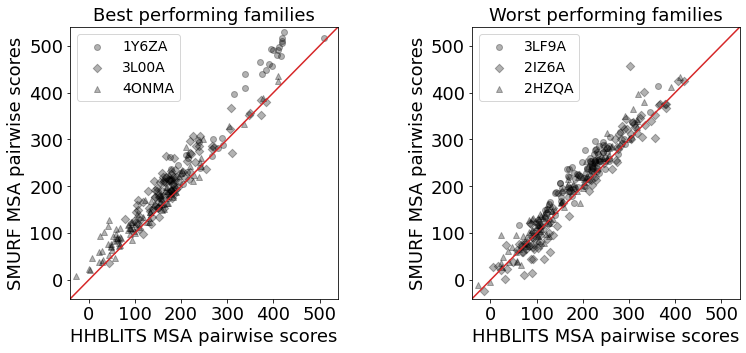

In [25]:
plt.rcParams.update({'font.size': 18})
markers = ['o','D','^']
scores_hhblits = {}
scores_SMURF = {}
pairs = get_random_pairs(1024, 100, seed = 0)
for key in special_fams[1:]:
    scores_hhblits[key] = [get_blosum_score(aln_hhblits[key], raw_seqs[key], p[0], p[1]) for p in pairs ]
    scores_SMURF[key] = [get_blosum_score(aln_evolve[key], raw_seqs[key], p[0], p[1]) for p in pairs ]

key = special_fams[0] # we only saved 10 seqs from this family because it is large   
pairs10 = []
for i in range(10):
    for j in range(i,10):
        pairs10.append((i,j))

scores_hhblits[key] = [get_blosum_score(aln_hhblits[key], raw_seqs[key], p[0], p[1]) for p in pairs10 ]
scores_SMURF[key] = [get_blosum_score(aln_evolve[key], raw_seqs[key], p[0], p[1]) for p in pairs10 ]
#mn = 100000
#mx = -100000

mn = -40
mx = 540

fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.subplots_adjust(wspace=.5)
i=0

i = 0
for n, key in enumerate(special_fams[:3]):
    ax[i].scatter(scores_hhblits[key],scores_SMURF[key], label = key, alpha = .3, marker =markers[n], c = 'black')
    #mn = min(min(scores_SMURF[key]+scores_hhblits[key]), mn)
    #mx = max(max(scores_SMURF[key]+scores_hhblits[key]), mx)

ax[i].plot([mn, mx],[mn,mx], c = 'tab:red')
ax[i].set_xlim(mn, mx)
ax[i].set_ylim(mn, mx)
ax[i].set_xticks(np.arange(0,501,100))
ax[i].set_yticks(np.arange(0,501,100))


ax[i].set_xlabel("HHBLITS MSA pairwise scores")
ax[i].set_ylabel("SMURF MSA pairwise scores")
ax[i].legend(fontsize = 14)
ax[i].set_title("Best performing families", fontsize = 18)

i = 1
for n, key in enumerate(special_fams[3:]):
    ax[i].scatter(scores_hhblits[key],scores_SMURF[key], label = key, alpha = .3, marker =markers[n], c = 'black')
    #mn = min(min(scores_SMURF[key]+scores_hhblits[key]), mn)
    #mx = max(max(scores_SMURF[key]+scores_hhblits[key]), mx)

ax[i].plot([mn, mx],[mn,mx], c = 'tab:red')
ax[i].set_xlim(mn, mx)
ax[i].set_ylim(mn, mx)
ax[i].set_xticks(np.arange(0,501,100))
ax[i].set_yticks(np.arange(0,501,100))

ax[i].set_xlabel("HHBLITS MSA pairwise scores")
ax[i].set_ylabel("SMURF MSA pairwise scores")
ax[i].legend(fontsize = 14)
ax[i].set_title("Worst performing families", fontsize = 18)
plt.savefig(f"../figures/SMURF_pairwise.svg", bbox_inches='tight')


## SMURF ALNS: all examples

In [17]:
special_fams = []
for file in os.listdir("../fam_results"):
    if file[:4] == "3_20" and file.split('_')[2] not in special_fams:
        special_fams.append(file.split('_')[2])
    

In [18]:
data = np.load("../data_unalign.npz", allow_pickle=True)
verbose = False
aucs = []
fams = []
raw_seqs = {}
for n,x in enumerate(data.keys()):
    if x not in special_fams: continue
    if verbose: print(f"family {x}")
    a = data[x].item()

    # prep data
    raw_seqs[x] = nf.sub_sample(a["ms"], 50)

In [38]:
date = "3_20"
fam_dir="../fam_results"
aln_scores_hhblits = {}
aln_scores_SMURF = {}
aln_res_hhblits = {}
aln_res_SMURF = {}
pairs = []
to_remove = []
for i in range(50):
    for j in range(i+1,50):
        pairs.append((i,j))
auc_SMURF = {}
auc_GREMLIN = {}
for fam in special_fams:
    mode="TRUE"
    aln, _,_ = pickle.load(open(f"{fam_dir}/{date}_{fam}_{mode}","rb"))
    aln_scores_hhblits[fam]=  [get_blosum_score_affine(aln, raw_seqs[fam], p[0], p[1]) for p in pairs ]
    aln_res_hhblits[fam] = count_ave_aligned_residues(aln, raw_seqs[fam], ms =50)
    
    mode = 'EvolveMRF_0.05_highest_MM_no_0.3_0.9'
    
    try:
        auc_SMURF[fam], aln, _ = pickle.load(open(f"{fam_dir}/{date}_{fam}_{mode}","rb"))
        aln_scores_SMURF[fam]= [get_blosum_score_affine(aln, raw_seqs[fam], p[0], p[1]) for p in pairs ]
        aln_res_SMURF[fam] = count_ave_aligned_residues(aln, raw_seqs[fam])

    except:
        to_remove.append(fam)
        print(f"did not find {fam_dir}/{date}_{fam}_{mode}")

    mode = 'Gremlin_0.05_64_G4_no_0.0_0.0'
    try:
        auc_GREMLIN[fam], _,_ = pickle.load(open(f"{fam_dir}/{date}_{fam}_{mode}","rb"))
    except:
        to_remove.append(fam)
        print(f"did not find {fam_dir}/{date}_{fam}_{mode}")
    
    print(f"finished fam {fam}")

finished fam 3PYWA
finished fam 3LYHA
finished fam 2P3WA
finished fam 3G2EA
finished fam 5I32A
finished fam 1MVLA
finished fam 1TQ5A
finished fam 4WEEA
finished fam 4X9JA
finished fam 3WSGA
finished fam 3H5JA
finished fam 2PFRA
finished fam 3ISRA
finished fam 5ITQA
finished fam 1SUMB
finished fam 3M7AA
finished fam 1LYQA
finished fam 3NUAA
finished fam 3IBZA
finished fam 4X84A
finished fam 1UI0A
finished fam 4H8EA
finished fam 4GWBA
finished fam 2VXNA
finished fam 5IJAA
finished fam 2IIHA
finished fam 2WNPF
finished fam 3POJA
finished fam 1W2WB
finished fam 2QQ4A
finished fam 2OFKA
finished fam 3OCMA
finished fam 1VZYA
finished fam 1RV9A
finished fam 3IS6A
finished fam 2HC8A
finished fam 3Q46A
finished fam 3MVUA
finished fam 2YN5A
finished fam 1FM0D
finished fam 3K8UA
finished fam 3NFDA
finished fam 1MPGA
finished fam 1K4IA
finished fam 3U2UA
finished fam 4GJZA
finished fam 1LFPA
finished fam 4NBXA
finished fam 4LWRA
finished fam 4PUIA
finished fam 3JXGA
finished fam 2QF4A
finished fam

In [39]:
to_remove

[]

In [41]:
b_diff_mean = []
b_diff_median = []
auc_diff = []
ar_diff =[]
for fam in special_fams:
    if fam in to_remove: continue
    auc_diff.append(auc_SMURF[fam]-auc_GREMLIN[fam])
    ar_diff.append(aln_res_SMURF[fam]-aln_res_hhblits[fam])
    b_diff_mean.append((np.mean(aln_scores_SMURF[fam]) - np.mean(aln_scores_hhblits[fam]))/len(raw_seqs[fam][0]))
    b_diff_median.append(np.median([aln_scores_SMURF[fam][_] - aln_scores_hhblits[fam][_] for _ in range(len(aln_scores_SMURF[fam]))])/len(raw_seqs[fam][0]))

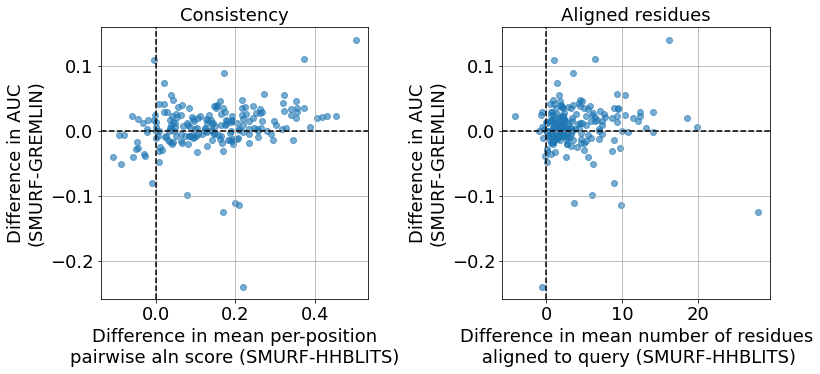

In [52]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.subplots_adjust(wspace=.5)
i=0
ax[i].scatter(b_diff_mean, auc_diff, alpha = .6)
ax[i].axhline(0, color= 'black', linestyle = "dashed")
ax[i].axvline(0, color= 'black',  linestyle = "dashed")

ax[i].set_xlabel("Difference in mean per-position\npairwise aln score (SMURF-HHBLITS)")
ax[i].set_ylabel("Difference in AUC\n(SMURF-GREMLIN)")
ax[i].set_title("Consistency", fontsize = 18)
ax[i].grid()

i=1
ax[i].scatter(ar_diff, auc_diff, alpha = .6)
ax[i].axhline(0, color= 'black', linestyle = "dashed")
ax[i].axvline(0, color= 'black',  linestyle = "dashed")

ax[i].set_xlabel("Difference in mean number of residues\n aligned to query (SMURF-HHBLITS)")
ax[i].set_ylabel("Difference in AUC\n(SMURF-GREMLIN)")
ax[i].set_title("Aligned residues",fontsize = 18)
ax[i].grid()
plt.savefig(f"../figures/SMURF_pairwise_aligned.svg", bbox_inches='tight')


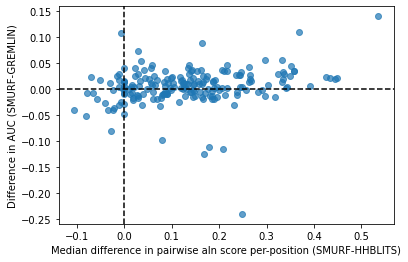

In [42]:
plt.scatter(b_diff_median, auc_diff, alpha = .7)
plt.axhline(0, color= 'black', linestyle = "dashed")
plt.axvline(0, color= 'black',  linestyle = "dashed")

plt.xlabel("Median difference in pairwise aln score per-position (SMURF-HHBLITS)")
plt.ylabel("Difference in AUC (SMURF-GREMLIN)")
plt.show()

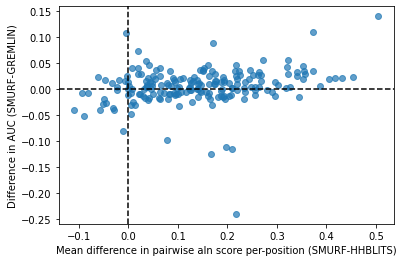

In [45]:
plt.scatter(b_diff_mean, auc_diff, alpha = .7)
plt.axhline(0, color= 'black', linestyle = "dashed")
plt.axvline(0, color= 'black',  linestyle = "dashed")

plt.xlabel("Mean difference in pairwise aln score per-position (SMURF-HHBLITS)")
plt.ylabel("Difference in AUC (SMURF-GREMLIN)")
plt.show()

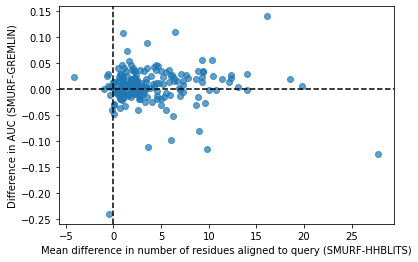

In [44]:
plt.scatter(ar_diff, auc_diff, alpha = .7)
plt.axhline(0, color= 'black', linestyle = "dashed")
plt.axvline(0, color= 'black',  linestyle = "dashed")

plt.xlabel("Mean difference in number of residues aligned to query (SMURF-HHBLITS)")
plt.ylabel("Difference in AUC (SMURF-GREMLIN)")
plt.show()

## LAM + AF alignments

In [26]:
OPT_scores = {}
OPT_gentle_scores = {}
HH_scores = {}
OPT_seqs = {}
OPT_gentle_seqs = {}
HH_seqs = {}

In [27]:
for dom in ["T1039-D1", "T1043-D1","T1064-D1","T1070-D1"]:
    _, OPT_gentle_seqs[dom] = get_seqs_from_sto(f"../examples/AF_2/2_26/alns/{dom}_opt_aln_Gentle_Cool.sto")
    _, OPT_seqs[dom] = get_seqs_from_sto(f"../examples/AF_2/2_26/alns/{dom}_opt_aln_None.sto")
    _, HH_seqs[dom] = get_seqs_from_sto(f"../examples/AF_2/2_26/alns/{dom}_input_aln.sto")
    OPT_scores[dom] = []
    OPT_gentle_scores[dom] = []
    HH_scores[dom] = []
    ns = len(OPT_gentle_seqs[dom])
    for i in range(ns):
        for j in range(i, ns):
            OPT_scores[dom].append(get_blosum_score_affine_from_pair(OPT_seqs[dom], i, j))
            OPT_gentle_scores[dom].append(get_blosum_score_affine_from_pair(OPT_gentle_seqs[dom], i, j))
            HH_scores[dom].append( get_blosum_score_affine_from_pair(HH_seqs[dom], i, j))

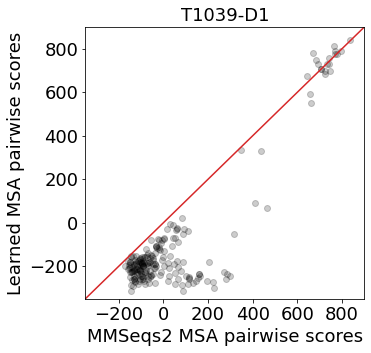

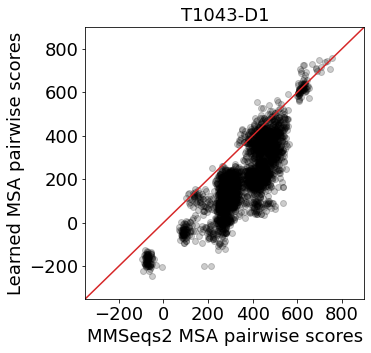

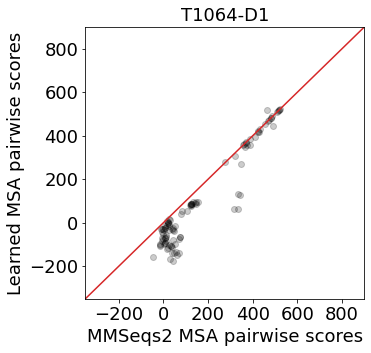

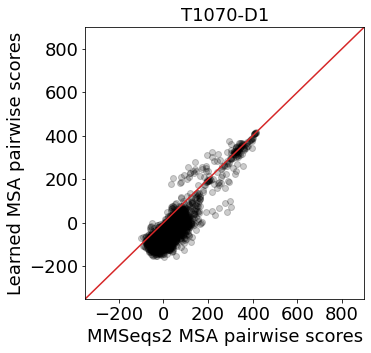

In [28]:
plt.rcParams.update({'font.size': 18})
for  n, dom in enumerate(["T1039-D1", "T1043-D1","T1064-D1","T1070-D1"]):
    fig, ax = plt.subplots(1,1, figsize=(5,5))

    ax.scatter(HH_scores[dom],OPT_gentle_scores[dom], alpha = .2, c='black' )
    #mn = 1.1 *min(HH_scores[dom]+OPT_gentle_scores[dom])
    #mx = 1.1*max(HH_scores[dom]+OPT_gentle_scores[dom])
    mn = -350
    mx = 900
    ax.plot([mn, mx],[mn,mx], c = 'tab:red')
    ax.set_xlim(mn, mx)
    ax.set_ylim(mn, mx)
    ax.set_xticks(np.arange(-200,801,200))
    ax.set_yticks(np.arange(-200,801,200))


    ax.set_xlabel("MMSeqs2 MSA pairwise scores")
    ax.set_ylabel("Learned MSA pairwise scores")
    ax.set_title(dom, fontsize = 18)
    plt.savefig(f"../figures/{dom}_pairwise.svg", bbox_inches='tight')
    plt.show()